# Week 3
## Data retrieval, preprocessing, and normalization for ML


## Basic Outline
  
* Where do data come from? Data retreival.
* Ideal datasets and data types
* Common wrangling needs and implementations

## Where did you get your data?



* Generated in-house (stored as CSVs, TSVs, SQL, proprietary, etc)

* Collaborators

* Public sources

## Scripting data retrieval improves reproducibility

In [43]:
# you may need to:
# !pip install requests

In [15]:
# Downloading a data file from a remote repository
import urllib
#THIS IS A WAY OF GETTING DATA FROM A URL

URL = "https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz"
#THIS is the URL you want

FILENAME = "brca_protein_expression.tsv.gz"
#THIS is what we will call the URL from here on out

urllib.request.urlretrieve(URL, FILENAME)
#This tells the library urllib to request to RETRIEVE from the interwebz using urlretrieve function the desired URL (which we previosuly named URL), and give it a desired filename

('brca_protein_expression.tsv.gz', <http.client.HTTPMessage at 0x11e53a390>)

* Scraping tools such as Mechanize and BeautifulSoup allow extraction of data from websites


In [16]:
import requests
# Retrieving data from a remote web service in JSON format that gets converted to a python structure:
def get_genome_sequence_ensembl(chromosome, start, end):
    """ API described here http://rest.ensembl.org/documentation/info/sequence_region"""
    url = 'https://rest.ensembl.org/sequence/region/human/{0}:{1}..{2}:1?content-type=application/json'.format(
        chromosome, start, end)
    r = requests.get(url, headers={"Content-Type": "application/json"}, timeout=10.000)
    if r.ok:
        return r.json()['seq']
#this ^ CREATES a function with 3 ARGUMENTS (chromosome, start, and end) 
#then insert URL and fill in the locations {0}, {1}, {2} that are passed here
#the REQUESTS library (imported above) has a GET function that passes the entire URL (which we defined) , then get outa JSON object (a request object) --> get it, then access seq attribute
#this will give a sequence of chromosome (the following specified locations)
print(get_genome_sequence_ensembl(7, 200000,200100))

TTCTTGACACTGATTGATCTGCCAAAAGGGGAAGAATGAGTCCAGCTAGAATCCAGGACTAACCAGCGGGTGAGCTTCAAGGAACAAAGGGCTTCCGCTGG



## Pandas covers most of the data retrieval needs

In [17]:
import pandas as pd
#often you're getting things with pandas, eg LOCALLY (from your comp), using the PANDA (pd) READ_CSV or READ_TABLE functions which read table or CSV into pd structure
# Let's read with pandas
# Note that we do not even need to unzip the file before opening!

brca_data = pd.read_csv(FILENAME, sep="\t")
#could also write as brca_data = pd.read_table(FILENAME, sep="\t")
#NOTE, the sep part of the above determines what you should use as the default SEPARATOR of data; default is commma but you can override it, eg here we are uising tabs

brca_data.head(1)
#head prints the HEADERS of your table
#since we put 1 in head, will only look at FIRST ROW. and it will be pandas data
#for mine, will prob need to update the days for spec things too

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


## Pandas can even retrieve from an SQL database directly

In [18]:
# you may need to 
# !pip install sqlalchemy
# !pip install pymysql

In [19]:
import sqlalchemy as sa
# Connect to UCSC genomic database
engine = sa.create_engine('mysql+pymysql://genome@genome-mysql.cse.ucsc.edu/hg38', poolclass=sa.pool.NullPool)
# select 3 SNPs from Chromosome Y
pd.read_sql("SELECT * FROM snp147Common WHERE chrom='chrY' LIMIT 3", engine)

ModuleNotFoundError: No module named 'pymysql'


## Pandas dataframes

* Dataframes are convenient containers for mixed data types

* Pandas is *incredibly useful* for data wrangling

* sklearn is happy to accept Pandas dataframes as input

* Pandas is built for exploratory analysis, visualization and stat tests / ML 

In [20]:
brca_data.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [21]:
brca_data.head(4)

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


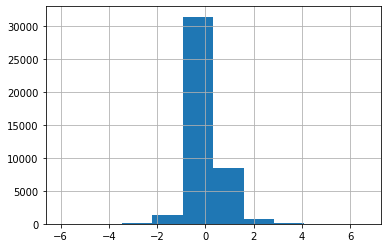

In [22]:
# Plotting boilerplate
import matplotlib.pyplot as plt
%matplotlib inline

brca_data['normalized_expression_level'].hist()

#accessing column BY NAME is square bracket notation, then visualizing w/ hist

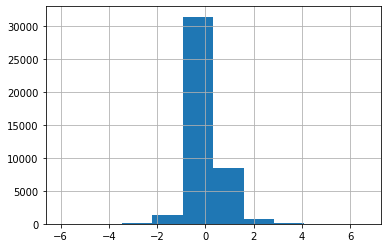

In [23]:
brca_data.normalized_expression_level.hist()
#alternate way of doing above

#accessing a column BY NAME in dot notation

In [24]:
%matplotlib inline

## Pre-processing a dataset: when are ready for ML?

* Ideally, data are organized as a table: examples-vs-features

* Data from multiple sources are combined

* Missing data are handled

* Features have been combined and manipulated as needed

* Any data that need to be normalized have been normalized

* Data are of the correct type (e.g. categorical vs continuous, boolean vs int)

## Let's have a look at Boston housing prices

In [25]:
boston = pd.read_table("https://biof509.github.io/spring2019/_downloads/776fb7b33137aa617c23025e1ac33b84/boston_data.csv", sep=",")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* Data from multiple sources are combined
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Combining data from multiple sources

In [26]:
boston_second_floor = pd.read_table("https://biof509.github.io/spring2019/_downloads/776fb7b33137aa617c23025e1ac33b84/boston_data.csv", sep=",")
#passing a table from a URL 
#can either use .read_table (as above
boston_second_floor.head()
#boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


In [27]:
boston_second_floor = pd.read_csv("https://biof509.github.io/spring2019/_downloads/776fb7b33137aa617c23025e1ac33b84/boston_data.csv", sep=",")
#passing a table from a URL 
#OR can use .read_csv

boston_second_floor.head()
#boston.head()


,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


In [28]:
boston = pd.read_csv("boston_data.csv")
boston.head()
#reading in with LOCAL file, rather than the URL

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


### Alternate way to get boston_second_floor info is to read it in locally

In [29]:
boston_second_floor = pd.read_csv("boston_second_floor.csv")

boston_second_floor.head()

,Id,2ndFlrSF
0,2,0
1,1,854
2,3,866
3,4,756
4,5,1053


## In the above variable boston

We have four "features" --> LotFrontage, CentralAir, 1stFlrSF, SaleCondition
We hae our "response" or "target vraiable" --> SalePrice

## Combining data from multiple sources

In [30]:
# Let's combine boston and boston second floor
boston = pd.merge(boston, boston_second_floor, on="Id")
#this MERGES two previously separate variables: boston, and boston_second_floor
#it MERGES them on the specified column, here "Id"
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053


In [31]:
# Let's add some additional data
boston3 = pd.read_csv("boston3.csv", sep=",")
boston3.head()

FileNotFoundError: [Errno 2] File b'boston3.csv' does not exist: b'boston3.csv'

## Thus far

In [32]:
boston.tail(10)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
33,34,70.0,Y,1700,Normal,165500,0
34,35,60.0,Y,1561,Normal,277500,0
35,36,108.0,Y,1132,Normal,309000,1320
36,37,112.0,Y,1097,Normal,145000,0
37,38,74.0,Y,1297,Normal,153000,0
38,39,68.0,Y,1057,Abnorml,109000,0
39,40,65.0,N,1152,AdjLand,82000,0
40,41,84.0,Y,1324,Abnorml,160000,0
41,42,115.0,Y,1328,Normal,170000,0
42,43,NaN,Y,884,Normal,144000,0


In [33]:
boston.shape
#tells you the NUMBER of ROWS and COLUMNS in your dataset (rows,columns)

(43, 7)

In [34]:
boston.tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68.0,Y,1057,Abnorml,109000,0
39,40,65.0,N,1152,AdjLand,82000,0
40,41,84.0,Y,1324,Abnorml,160000,0
41,42,115.0,Y,1328,Normal,170000,0
42,43,NaN,Y,884,Normal,144000,0


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Missing data
There are a number of ways to handle missing data:

* Drop all records with a value missing (simplest, but can lead to bias)
* Substitute all missing values with an approximated value (usually depends on data and algorithm)
* Add additional feature indicating when a value is missing

## Missing data

In [35]:
#boston.fillna()
#THIS FUNCTION IS SUPER POWERFUL
#it FILLS ALL MISSING values with the specified value

#EG

#if say boston.fillna(0); it will FILL ALL null values with 0
#for consistencies sake

In [36]:
boston.isna()
#the above gives you a BOOLEAN of all values which are not seen

boston.isna().sum()
#tells you how many missing values you have in each COLUMN

Id               0
LotFrontage      7
CentralAir       0
1stFlrSF         0
SaleCondition    0
SalePrice        0
2ndFlrSF         0
dtype: int64

In [37]:
boston.isna().sum().sum()
#sums up ALL missing values regardless of column

7

In [38]:
boston.info()
#gives info about dataset
#anywhere where n < 43, know you have some missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 7 columns):
Id               43 non-null int64
LotFrontage      36 non-null float64
CentralAir       43 non-null object
1stFlrSF         43 non-null int64
SaleCondition    43 non-null object
SalePrice        43 non-null int64
2ndFlrSF         43 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ KB


In [39]:
# Drop all records with missing data
#boston.isnull().tail()
# boston.isnull().sum()
# boston.isnull().sum().sum()
#boston.tail()
#boston.dropna().tail()



#REMOVES all missing values

#boston..isnull.sum() does similar as above but is worse b/c we have a function called .fillna BUT not something called .fillnull

In [40]:
boston.dropna()
#Drops the ROWS (default) or COLUMNS (if specified) of any data containing missing values
#boston.dropna(axis=1); axis = 1 = columns
#boston.dropna(axis=0); axis = 0 = rows (and is default)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053
5,6,85.0,Y,796,Normal,143000,566
6,7,75.0,Y,1694,Normal,307000,0
8,9,51.0,Y,1022,Abnorml,129900,752
9,10,50.0,Y,1077,Normal,118000,0
10,11,70.0,Y,1040,Normal,129500,0


In [41]:
boston.isna().sum()

Id               0
LotFrontage      7
CentralAir       0
1stFlrSF         0
SaleCondition    0
SalePrice        0
2ndFlrSF         0
dtype: int64

In [42]:
# Substitute missing values
# boston.fillna("Value!").tail()
boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail()
#if no missing values, .fillna will just ignore it

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68,Y,1057,Abnorml,109000,0
39,40,65,N,1152,AdjLand,82000,0
40,41,84,Y,1324,Abnorml,160000,0
41,42,115,Y,1328,Normal,170000,0
42,43,Value2!,Y,884,Normal,144000,0


In [43]:
boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail().dtypes
#.DTYPES tells you what kind of input your value is
#you prob want it to be int or float --> ie numeric; not string

Id                int64
LotFrontage      object
CentralAir       object
1stFlrSF          int64
SaleCondition    object
SalePrice         int64
2ndFlrSF          int64
dtype: object

In [44]:
print(boston.mean())

print(boston.median())


Id                 22.000000
LotFrontage        74.055556
1stFlrSF         1173.860465
SalePrice      178170.930233
2ndFlrSF          236.697674
dtype: float64
Id                 22.0
LotFrontage        70.0
1stFlrSF         1132.0
SalePrice      154000.0
2ndFlrSF            0.0
dtype: float64


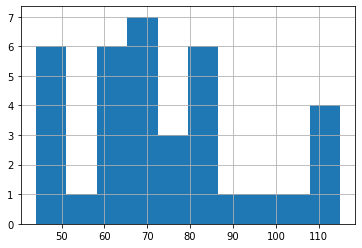

In [45]:
boston['LotFrontage'].hist()
#alt way of doing boston.LotFrontage.hist()
#sometimes good to map data to make sure it makes sense

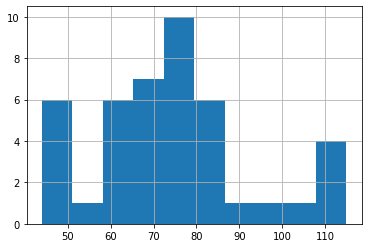

In [46]:
#if want to FILL MISSING VALUES before plotting
#this will FILL MISSING VALUES of boston.LotFrontgage (.fillna) with the MEAN of boston.LotFrontage, then plot on histo
boston.LotFrontage.fillna(boston.LotFrontage.mean()).hist()

# This is known as MEAN imputation
## Can also do the same with MEDIAN imputation

In [47]:
boston.loc[boston.LotFrontage.isna()]
#this will SHOW YOU all the null values in the dataset boston, specifically where the COLUMN "LotFrontage" is null

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
7,8,NaN,Y,1107,Normal,200000,983
12,13,NaN,Y,912,Normal,144000,0
14,15,NaN,Y,1253,Normal,157000,0
16,17,NaN,Y,1004,Normal,149000,0
24,25,NaN,Y,1060,Normal,154000,0
31,32,NaN,Y,1228,Normal,149350,0
42,43,NaN,Y,884,Normal,144000,0


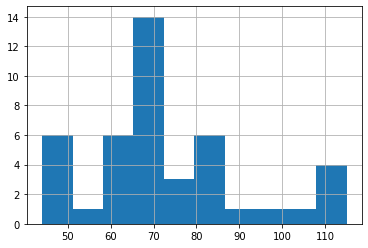

In [48]:
boston.LotFrontage.fillna(boston.LotFrontage.median()).hist()

In [49]:
boston.loc[~boston.LotFrontage.isna()]
#the SQUIGGLE ~ tells it NOT --> ie where boston.LotFrontage is NOT na (all values where it has something other than null)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053
5,6,85.0,Y,796,Normal,143000,566
6,7,75.0,Y,1694,Normal,307000,0
8,9,51.0,Y,1022,Abnorml,129900,752
9,10,50.0,Y,1077,Normal,118000,0
10,11,70.0,Y,1040,Normal,129500,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fd30a50>,
      dtype=object)

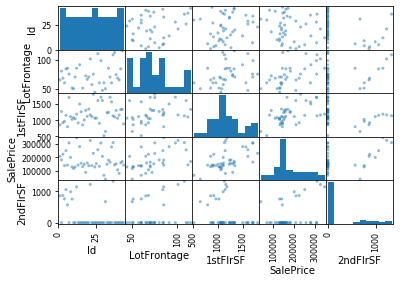

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston)

# Notes for scatter plots
## if features correlate with TARGET, this is GOOD; probably predictive
## if featuers correlate with EACH OTHER; that's bad, should prob drop

In [51]:
boston.corr()

,Id,LotFrontage,1stFlrSF,SalePrice,2ndFlrSF
Id,1.000000,0.224077,0.171229,-0.174639,-0.386726
LotFrontage,0.224077,1.000000,0.325814,0.524534,0.168788
1stFlrSF,0.171229,0.325814,1.000000,0.548817,-0.290534
SalePrice,-0.174639,0.524534,0.548817,1.000000,0.409321
2ndFlrSF,-0.386726,0.168788,-0.290534,0.409321,1.000000


# Notes for correlation
## Want things that correlate well, but if they correlate too well with eachother becomes problematic
### May end up (say if correlation w eachother >.8) introducing at best similar info into model
### At worst, may cause tem to FAIL TO CONVERGE in order to minimize data
#### (this is like a linear regression model). Diff from what you will be doing for nonparametric things (decision tree or yes/no - not something you can describe in linear equation)

### Can run a PCA analysis beforehand if v worried about multiple things correlating to reduce dimensions and getting rid of correlated features

In [52]:
#IF value was CATEGROCIAL, you'd probabl want to use the MODE
boston.LotFrontage.mode()
#eg look @ number of days it rains; if it rains almost every day guess that it will rain the missing day [ie guess the most frequent]

0    60.0
dtype: float64

In [53]:
# Substitute missing values with mean
print(boston.mean())
boston.fillna(boston.mean()).tail()

# THIS DOES NOT change the actual data
#This only SHOWS WHAT IT IS!!!


#print(boston.median())
#boston.fillna(boston.median()).tail()

Id                 22.000000
LotFrontage        74.055556
1stFlrSF         1173.860465
SalePrice      178170.930233
2ndFlrSF          236.697674
dtype: float64


,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68.000000,Y,1057,Abnorml,109000,0
39,40,65.000000,N,1152,AdjLand,82000,0
40,41,84.000000,Y,1324,Abnorml,160000,0
41,42,115.000000,Y,1328,Normal,170000,0
42,43,74.055556,Y,884,Normal,144000,0


In [54]:
# Add column indicating missing values
boston["2ndFlrSF"].isnull()
#boston["missing_second_floor"] = boston["2ndFlrSF"].isnull()
# boston.tail()
boston = boston.fillna(boston.mean())
#BECAUSE you REDIFINED BOSTON, you have NOW CHANGED THE DATASET to include the missing value filled in
#THIS ACTUALY MODS IT
boston.tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68.000000,Y,1057,Abnorml,109000,0
39,40,65.000000,N,1152,AdjLand,82000,0
40,41,84.000000,Y,1324,Abnorml,160000,0
41,42,115.000000,Y,1328,Normal,170000,0
42,43,74.055556,Y,884,Normal,144000,0


In [55]:
# You may need to upgrade Scikit-learn (and restart Jupyter kernel afterwards) to use Imputer
# !pip install scikit-learn --upgrade

In [56]:
# Imputation is a general technique for "guessing" appropriate missing values
# It could be implemented as a complex ML regression algorithm or a simple 'take an average' strategy.
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(strategy='mean')
#this IMPUTES missing values
#gives them what you define STRATEGY as (eg mean, median, "most common = mode")
imputer.fit_transform(boston[["LotFrontage"]])
#now we run it on the boston dataset, under the column "LotFrontage"
#and it will do it then return an array

array([[ 65.        ],
       [ 80.        ],
       [ 68.        ],
       [ 60.        ],
       [ 84.        ],
       [ 85.        ],
       [ 75.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 50.        ],
       [ 70.        ],
       [ 85.        ],
       [ 74.05555556],
       [ 91.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 74.05555556],
       [ 72.        ],
       [ 66.        ],
       [ 70.        ],
       [101.        ],
       [ 57.        ],
       [ 75.        ],
       [ 44.        ],
       [ 74.05555556],
       [110.        ],
       [ 60.        ],
       [ 98.        ],
       [ 47.        ],
       [ 60.        ],
       [ 50.        ],
       [ 74.05555556],
       [ 85.        ],
       [ 70.        ],
       [ 60.        ],
       [108.        ],
       [112.        ],
       [ 74.        ],
       [ 68.        ],
       [ 65.        ],
       [ 84.        ],
       [115.        ],
       [ 74.05555556]])

In [58]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(boston[["LotFrontage"]])

array([[ 65.        ],
       [ 80.        ],
       [ 68.        ],
       [ 60.        ],
       [ 84.        ],
       [ 85.        ],
       [ 75.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 50.        ],
       [ 70.        ],
       [ 85.        ],
       [ 74.05555556],
       [ 91.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 74.05555556],
       [ 72.        ],
       [ 66.        ],
       [ 70.        ],
       [101.        ],
       [ 57.        ],
       [ 75.        ],
       [ 44.        ],
       [ 74.05555556],
       [110.        ],
       [ 60.        ],
       [ 98.        ],
       [ 47.        ],
       [ 60.        ],
       [ 50.        ],
       [ 74.05555556],
       [ 85.        ],
       [ 70.        ],
       [ 60.        ],
       [108.        ],
       [112.        ],
       [ 74.        ],
       [ 68.        ],
       [ 65.        ],
       [ 84.        ],
       [115.        ],
       [ 74.05555556]])

## How to decide how to treat missing data?
* Very data-dependent!
* Decisions need to be justified and DOCUMENTED
* Implement missing data preprocessing in a reproducible way (python script)
### * Don't create data from nothing
* Iris example

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [60]:
boston.dtypes

Id                 int64
LotFrontage      float64
CentralAir        object
1stFlrSF           int64
SaleCondition     object
SalePrice          int64
2ndFlrSF           int64
dtype: object

In [63]:
#we might want to change NON numeric values o numeric, eg
boston.SaleCondition

0      Normal
1      Normal
2      Normal
3     Abnorml
4      Normal
5      Normal
6      Normal
7      Normal
8     Abnorml
9      Normal
10     Normal
11    Partial
12     Normal
13    Partial
14     Normal
15     Normal
16     Normal
17     Normal
18     Normal
19    Abnorml
20    Partial
21     Normal
22     Normal
23     Normal
24     Normal
25     Normal
26     Normal
27     Normal
28     Normal
29     Normal
30     Normal
31     Normal
32     Normal
33     Normal
34     Normal
35     Normal
36     Normal
37     Normal
38    Abnorml
39    AdjLand
40    Abnorml
41     Normal
42     Normal
Name: SaleCondition, dtype: object

In [64]:
boston.SaleCondition.unique()
#This will tell you the UNIQUE values (eg so you can assign 1-4, or wahtever)

array(['Normal', 'Abnorml', 'Partial', 'AdjLand'], dtype=object)

In [66]:
boston.CentralAir
#consider convertin to 1s and 0s

0     Y
1     Y
2     Y
3     Y
4     Y
5     Y
6     Y
7     Y
8     Y
9     Y
10    Y
11    Y
12    Y
13    Y
14    Y
15    Y
16    Y
17    Y
18    Y
19    Y
20    Y
21    Y
22    Y
23    Y
24    Y
25    Y
26    Y
27    Y
28    Y
29    N
30    N
31    Y
32    Y
33    Y
34    Y
35    Y
36    Y
37    Y
38    Y
39    N
40    Y
41    Y
42    Y
Name: CentralAir, dtype: object

In [70]:
#
#
#THIS IUNCTION IS VERY USEFUL FOR TAKING NON-NUMERIC VALUES AND CONVERTING TO dummy COLUMNS
pd.get_dummies(boston, columns=["SaleCondition"],)
#ie takes all the different values from orig column, and subdivides into separate values

,Id,LotFrontage,CentralAir,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,1,65.000000,Y,856,208500,854,0,0,1,0
1,2,80.000000,Y,1262,181500,0,0,0,1,0
2,3,68.000000,Y,920,223500,866,0,0,1,0
3,4,60.000000,Y,961,140000,756,1,0,0,0
4,5,84.000000,Y,1145,250000,1053,0,0,1,0
5,6,85.000000,Y,796,143000,566,0,0,1,0
6,7,75.000000,Y,1694,307000,0,0,0,1,0
7,8,74.055556,Y,1107,200000,983,0,0,1,0
8,9,51.000000,Y,1022,129900,752,1,0,0,0
9,10,50.000000,Y,1077,118000,0,0,0,1,0


In [71]:
#you can then ASSIGN this back to boston data frame so it can be used
boston = pd.get_dummies(boston, columns=["SaleCondition"],)

In [72]:
boston.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [93]:
#
#
#
#
#
#THIS IS SUPER POWERFUL TO CHANGE BINARY THINGS
boston['CentralAir'] = boston.CentralAir.map({"Y": 1, "N": 0})
#you can use map to do binary encoding of data
#into boston dataframe, column 'CentralAir' (boston['CentralAir'])
#you are remapping the olumn CentralAir wehre every Y becomes a 1 and every N becomes a 0

In [94]:
boston.CentralAir.unique()

array([1, 0])

In [96]:
boston.dtypes

Id                         int64
LotFrontage              float64
CentralAir                 int64
1stFlrSF                   int64
SalePrice                  int64
2ndFlrSF                   int64
SaleCondition_Abnorml      uint8
SaleCondition_AdjLand      uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
total_sf                   int64
dtype: object

In [74]:
boston.corr()

,Id,LotFrontage,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.208275,0.171229,-0.174639,-0.386726,0.017538,0.223814,-0.009213,-0.139766
LotFrontage,0.208275,1.000000,0.315133,0.517116,0.158382,-0.155335,-0.080258,-0.027910,0.287509
1stFlrSF,0.171229,0.315133,1.000000,0.548817,-0.290534,-0.042404,-0.011855,-0.024965,0.100237
SalePrice,-0.174639,0.517116,0.548817,1.000000,0.409321,-0.216497,-0.207951,-0.085045,0.531251
2ndFlrSF,-0.386726,0.158382,-0.290534,0.409321,1.000000,0.056077,-0.086996,-0.236618,0.358755
SaleCondition_Abnorml,0.017538,-0.155335,-0.042404,-0.216497,0.056077,1.000000,-0.055972,-0.705036,-0.099340
SaleCondition_AdjLand,0.223814,-0.080258,-0.011855,-0.207951,-0.086996,-0.055972,1.000000,-0.299912,-0.042258
SaleCondition_Normal,-0.009213,-0.027910,-0.024965,-0.085045,-0.236618,-0.705036,-0.299912,1.000000,-0.532291
SaleCondition_Partial,-0.139766,0.287509,0.100237,0.531251,0.358755,-0.099340,-0.042258,-0.532291,1.000000


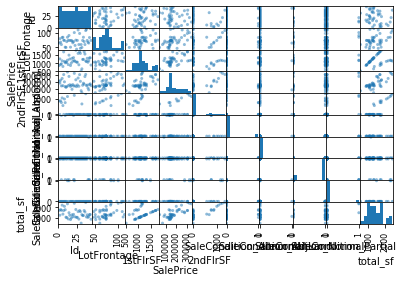

In [79]:
scatter_matrix(boston);
#this is from the plotting module
#(if you've already imported panda, you can do this as is)
#if not, use pd.plotting.scatter_matrix(boston);

In [80]:
#pd.plotting is a VERY POWERFUL thiggn --> can use many things to corelate

In [83]:
#pd.plotting.autocorrelation_plot(boston) eg (though will need to modify it to match what the coe wants)

In [84]:
import seaborn as sns

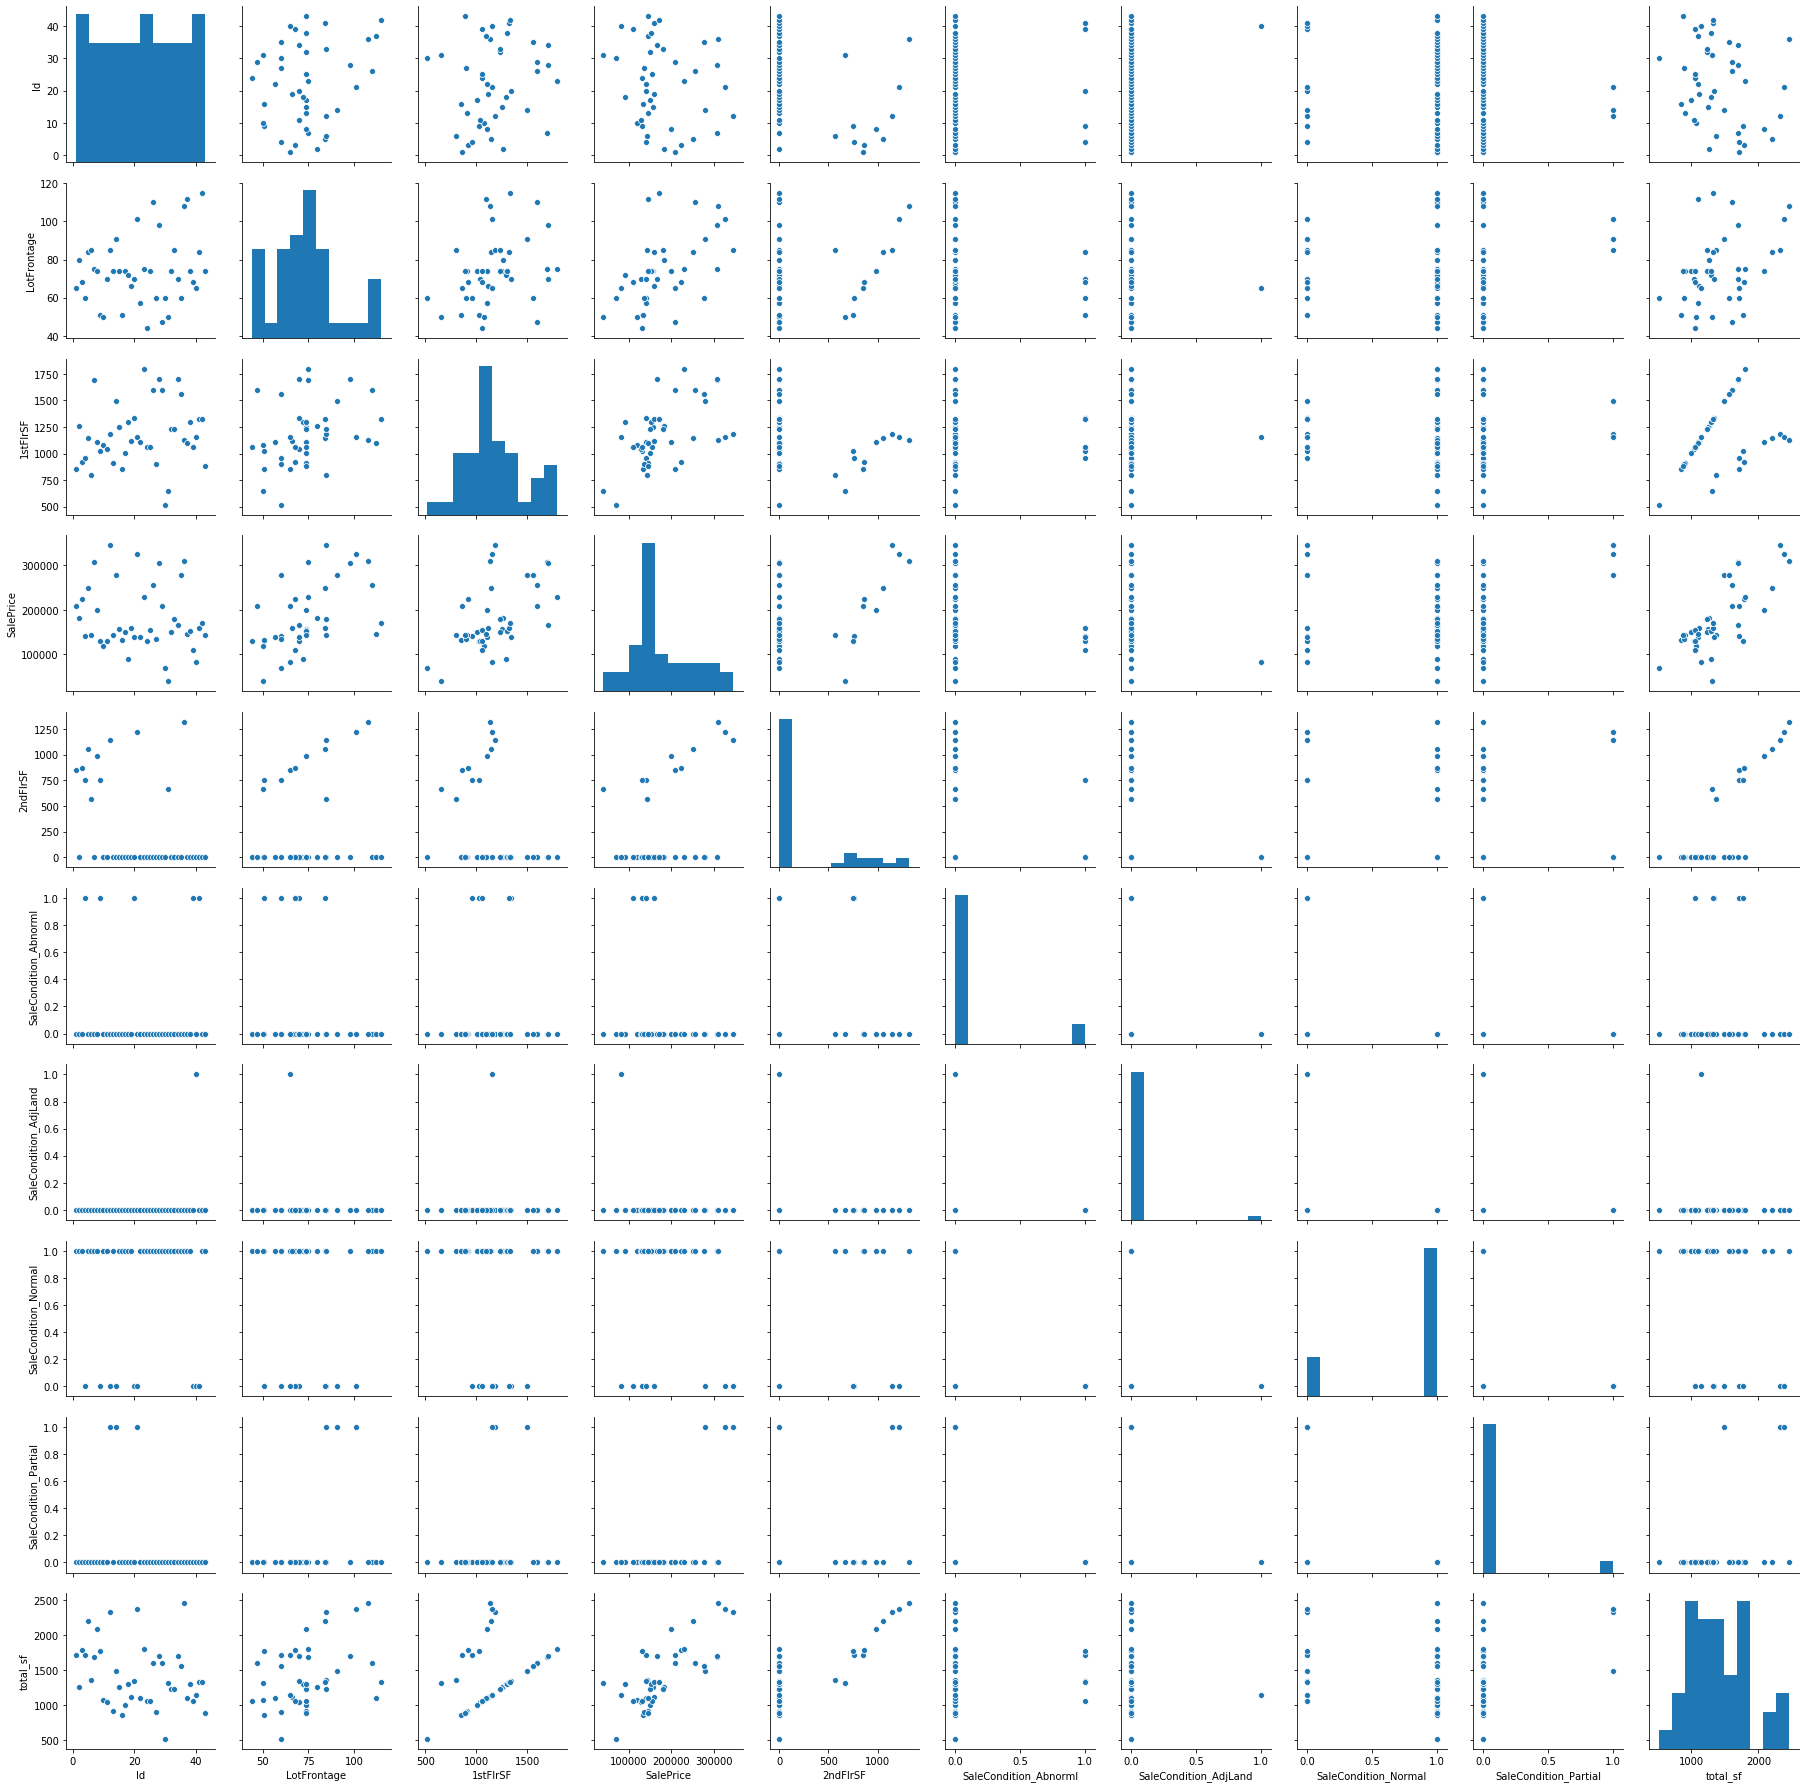

In [86]:
sns.pairplot(boston);
#sns tends to look much nicer than pandas
#seaborn pairplot is equivalent of pandas scatter matrix

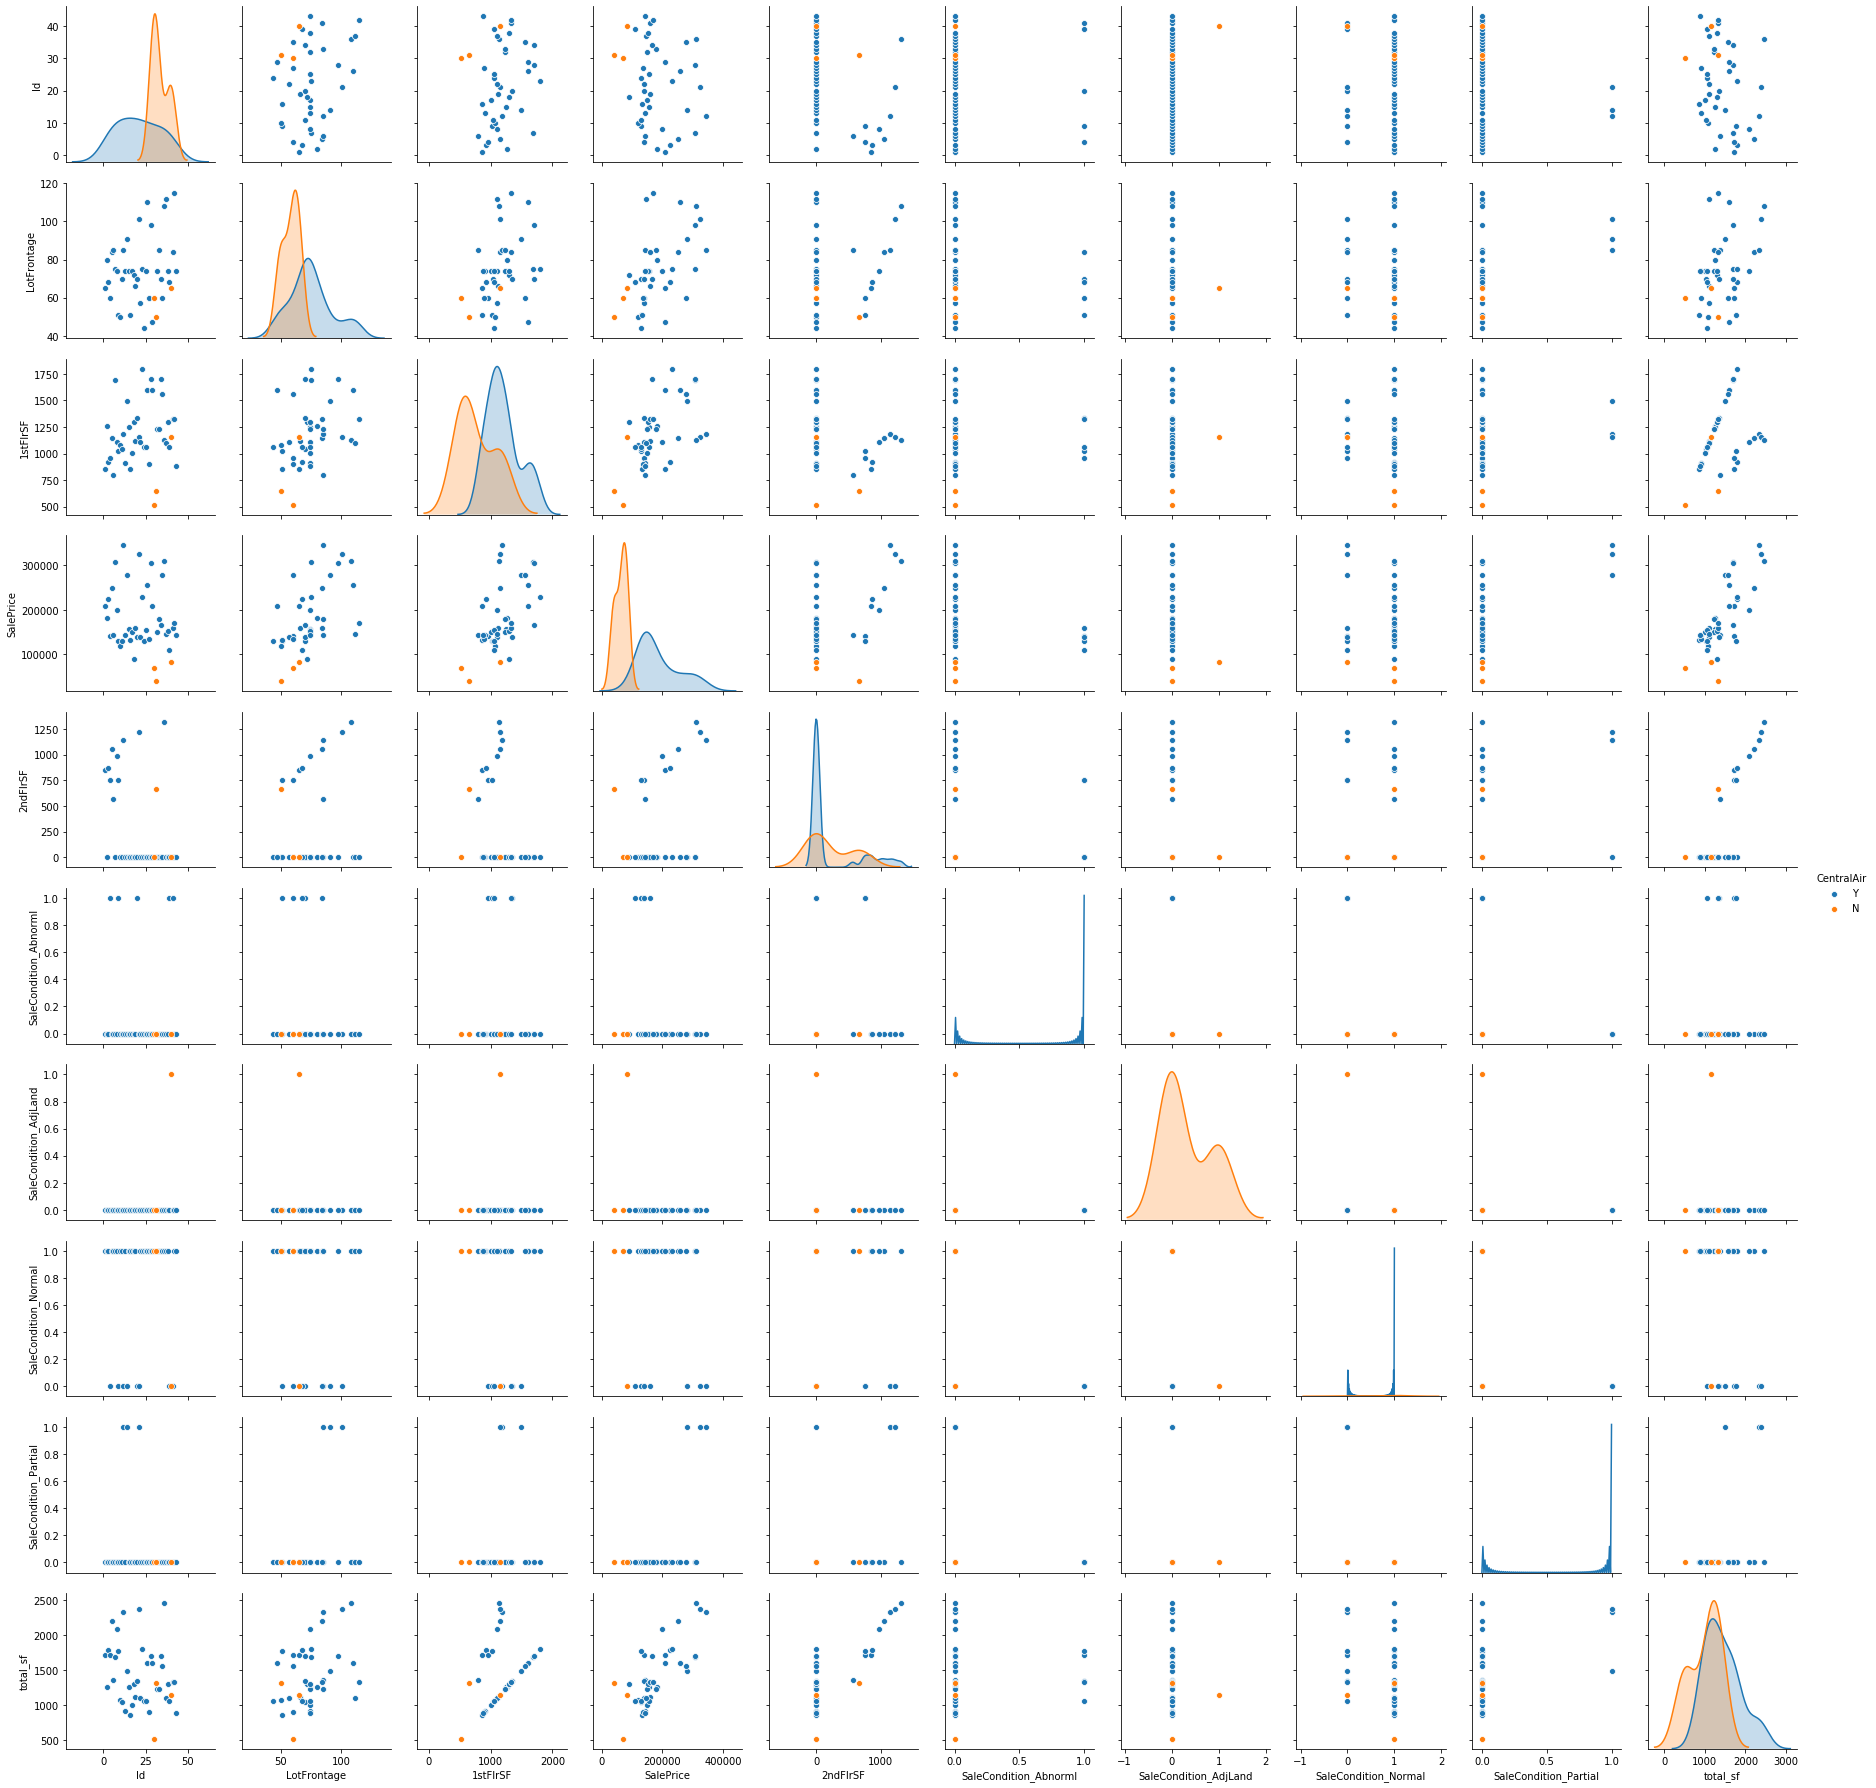

In [88]:
sns.pairplot(boston, hue="CentralAir");
#works best w/ binary things

In [98]:
# boston.head()
#this is getting the TOTAL square footage by coming the FIRST and SECOND floor square footage
boston["total_sf"] = boston["1stFlrSF"] + boston["2ndFlrSF"]
boston.head()
#this is an example of feature engineering

,Id,LotFrontage,CentralAir,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,total_sf
0,1,65.0,1,856,208500,854,0,0,1,0,1710
1,2,80.0,1,1262,181500,0,0,0,1,0,1262
2,3,68.0,1,920,223500,866,0,0,1,0,1786
3,4,60.0,1,961,140000,756,1,0,0,0,1717
4,5,84.0,1,1145,250000,1053,0,0,1,0,2198


In [99]:
#this wont work anymore b/c already ereplaced variables with dummy variables

#boston.head()
#boston = boston.replace({"Abnorml": "abnormal", "Normal": "normal"})
#boston.head()

In [102]:
#
#
#
#pretty powerful
#
#only includes NUMERIC data
boston.select_dtypes(include='number')
#Can also use this function to select OTHER object types

,Id,LotFrontage,CentralAir,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,total_sf
0,1,65.000000,1,856,208500,854,0,0,1,0,1710
1,2,80.000000,1,1262,181500,0,0,0,1,0,1262
2,3,68.000000,1,920,223500,866,0,0,1,0,1786
3,4,60.000000,1,961,140000,756,1,0,0,0,1717
4,5,84.000000,1,1145,250000,1053,0,0,1,0,2198
5,6,85.000000,1,796,143000,566,0,0,1,0,1362
6,7,75.000000,1,1694,307000,0,0,0,1,0,1694
7,8,74.055556,1,1107,200000,983,0,0,1,0,2090
8,9,51.000000,1,1022,129900,752,1,0,0,0,1774
9,10,50.000000,1,1077,118000,0,0,0,1,0,1077


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Normalization
* What is it?
* Why do it? (data sources, feature distributions)
* Types?

# scikit-learn object types
1. estimators
- classfiers
- regressors
2. Transformers

### Normalization

Many machine learning algorithms expect features to have similar distributions and scales.

A classic example is gradient descent, if features are on different scales some weights will update faster than others because the feature values scale the weight updates.

There are two common approaches to normalization:

* Z-score standardization
* Min-max scaling

#### Z-score standardization

Z-score standardization rescales values so that they have a mean of zero and a standard deviation of 1. Specifically we perform the following transformation:

$$z = \frac{x - \mu}{\sigma}$$

#### Min-max scaling

An alternative is min-max scaling that transforms data into the range of 0 to 1. Specifically:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

#### Min-max scaling is less commonly used but can be useful for image data and in some neural networks.

In [108]:
# a = (boston['1stFlrSF'] - boston['1stFlrSF'].mean()) / boston['1stFlrSF'].std()
# boston['1stFlrSF'].hist()
# boston.head()
## boston.total_sf.hist()
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

scaler = StandardScaler()

import numpy as np

In [109]:
scaler.fit_transform(boston[['1stFlrSF']]).sum()

-3.552713678800501e-15

In [111]:
#hence above is very small transformation
#can see if values are close to 0 transform with following
np.isclose(scaler.fit_transform(boston[['1stFlrSF']]).mean(), 0)
#where you can sub out mean for things like standard dev (std), etc
#all arrays hsould have sum min max std mean etc

True

#StandardScaler() (scaler) has many functions
#we will mainly use FIT, TRANSFORM and FIT_TRANSFORM
#fit_transform trains transforemr to do certain type of transformation

scaler.transform #transorms data
scaler.fit() #train the transformer to work on future data
scaler.fit_transform() #does both of above steps
#hence you really use FIT_TRANSFORM to train the data
#then you use TRANSFORM alone in subsequent new data

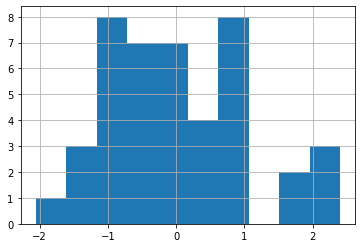

In [112]:
# print(scaler.fit_transform(boston[['1stFlrSF']]))
scaled_size = pd.Series(scale(boston.total_sf))
scaled_size.hist()
#scaled_size.mean()
#scaled_size.std(ddof=0)
#boston["normalized_total_sf"] = scaled_size

In [113]:
#
#
#NOTE since we used as our scaler the STANDARDSCALER(), you should transform to something like a NORMAL DISTRIBUTION

In [115]:
scaler = MinMaxScaler()
print(scaler.fit_transform(boston[['1stFlrSF']]))
#MinMaxScaler(0) works exact same way as standard scaler

[[0.26352941]
 [0.58196078]
 [0.31372549]
 [0.34588235]
 [0.49019608]
 [0.21647059]
 [0.92078431]
 [0.46039216]
 [0.39372549]
 [0.43686275]
 [0.40784314]
 [0.51921569]
 [0.30745098]
 [0.76392157]
 [0.57490196]
 [0.26196078]
 [0.37960784]
 [0.60862745]
 [0.46588235]
 [0.64235294]
 [0.50039216]
 [0.46117647]
 [1.        ]
 [0.42352941]
 [0.42352941]
 [0.84705882]
 [0.29803922]
 [0.92862745]
 [0.84705882]
 [0.        ]
 [0.10117647]
 [0.55529412]
 [0.56      ]
 [0.9254902 ]
 [0.81647059]
 [0.48      ]
 [0.45254902]
 [0.60941176]
 [0.42117647]
 [0.49568627]
 [0.63058824]
 [0.63372549]
 [0.2854902 ]]


# PREPROCESSING
## from sklearn.preprocessing import
### ^the above gives you access to MANY DIFFERENT USEFUL TOOLS, eg dummy variables (one hot encoder; tho can just use pandas as we did above)

## Other preprocessing / normalization techniques and thoughts
* http://scikit-learn.org/stable/modules/preprocessing.html
* http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [118]:
boston["CentralAir"] == 1
#looking for boolean arrays
#can use any equivalence (eg == Y, ==172jg, etc)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39    False
40     True
41     True
42     True
Name: CentralAir, dtype: bool

In [122]:
#boston.head()
import numpy as np

# boston["1stFlrSF"].mean(skipna=False)
boston["CentralAir_bool"] = boston["CentralAir"] == 1
#adding a new column (CentralAir_bool)
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,total_sf,CentralAir_bool
0,1,65.0,1,856,208500,854,0,0,1,0,1710,True
1,2,80.0,1,1262,181500,0,0,0,1,0,1262,True
2,3,68.0,1,920,223500,866,0,0,1,0,1786,True
3,4,60.0,1,961,140000,756,1,0,0,0,1717,True
4,5,84.0,1,1145,250000,1053,0,0,1,0,2198,True


In [124]:
# boston.head()
# boston["SaleCondition"].dtype
#boston["SaleCondition"].head()


boston["SaleCondition"].astype("category").dtype
#this would have turned the SaleCondition (which used to have 4 diff things) into the category data type, which is an alt way of doing the dummy variables
#doesn't work now b/c already cahgned Sale Condition into 4 diff variabes


#boston["SaleCondition"] = boston["SaleCondition"].astype("category")
#boston["SaleCondition"].dtype

KeyError: 'SaleCondition'

pd.get_dummies ~ OneHotEncoder

LABEL BINARIZER is a TRANSFORMER
First instantiate (as seen below)
Then apply it

In [126]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(['yes', 'yes', 'no', 'no'])          

array([[1],
       [1],
       [0],
       [0]])

In [128]:
lb.fit_transform(['yes', 'yes', 'no', 'no', 'maybe'])
#this LEARNS how to binarize data, and transforms (binarizers, ehre) it since you're using the FIT_TRANSFORM feature 
#for future could just use transform

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [37]:
ohe = OneHotEncoder()
sparse_matrix = ohe.fit_transform(boston[['SaleCondition', 'CentralAir_bool']])
sparse_matrix.todense()
#this takes two columns, and converts into BINARY code
#you get 6 columns out, one for each of two possibilities of central air (Y/N), and 4 for the 4 categories of sale condtion

matrix([[0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0

### Another example of categorical data conversion to boolean features

In [129]:
x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  ['Green','Red','Blue','Blue','Green','Red','Green']], ).T
x.columns = ['A', 'B', 'C', 'D', 'E']
x

,A,B,C,D,E
0,0,2,0.1,100,Green
1,1,NaN,0.12,120,Red
2,2,7,0.11,NaN,Blue
3,3,4,0.15,127,Blue
4,4,9,0.16,130,Green
5,5,1,0.11,121,Red
6,6,3,0.14,124,Green


In [130]:
x.values.T
#T --> transposition of array

array([[0, 1, 2, 3, 4, 5, 6],
       [2, nan, 7, 4, 9, 1, 3],
       [0.1, 0.12, 0.11, 0.15, 0.16, 0.11, 0.14],
       [100, 120, nan, 127, 130, 121, 124],
       ['Green', 'Red', 'Blue', 'Blue', 'Green', 'Red', 'Green']],
      dtype=object)

In [131]:
x_cat = x.copy()
for val in x['E'].unique():
    x_cat['E_{0}'.format(val)] = x_cat['E'] == val
x_cat
#this is to get around the fact that python only creates REFERENCS to a single data frame when you assign multiple things to the same one
#eg if oyu say z=x and y=x; all three things will point to x but x only exists once
#(contrast w/ R)
#get around this using above

,A,B,C,D,E,E_Green,E_Red,E_Blue
0,0,2,0.1,100,Green,True,False,False
1,1,NaN,0.12,120,Red,False,True,False
2,2,7,0.11,NaN,Blue,False,False,True
3,3,4,0.15,127,Blue,False,False,True
4,4,9,0.16,130,Green,True,False,False
5,5,1,0.11,121,Red,False,True,False
6,6,3,0.14,124,Green,True,False,False


In [ ]:
#ALT WAYS TO DO the following portion of above
#for val in x['E'].unique()

#...you can use --> LIST COMPREHENSION
#[val for val in x['E'].unique()]
#[val for val in x.E.unique()]



In [40]:
# Another option to have one feature per color is to use Pivot
# Note that it will create missing data:
x.pivot(index='A', columns='E', values='C')

E,Blue,Green,Red
A,,,
0,NaN,0.1,NaN
1,NaN,NaN,0.12
2,0.11,NaN,NaN
3,0.15,NaN,NaN
4,NaN,0.16,NaN
5,NaN,NaN,0.11
6,NaN,0.14,NaN


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* ~~Data are of correct type (e.g. categorical vs continuous, boolean vs int)~~

## Other types of data storage
* Image
* Text

### Image

Datasets with images also need to follow samples-by-features format.
Features in this case are pixels and their intensities. For black and white images intensities are binary. For grayscale they could be integer or floating point numbers. Color images are usually represented as multiple images - one for each color channel (e.g. red / green / blue).

Thus each image is represented as a one dimensional array, which is exactly what's needed for ML applications. To visualize it, however, we need to change its shape.

In [132]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()     
print("Dimensionality samples x features", dataset.data.shape)

# first image - pixel intensities
dataset.data[0]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/danlichtenstein/scikit_learn_data
Dimensionality samples x features (400, 4096)


array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

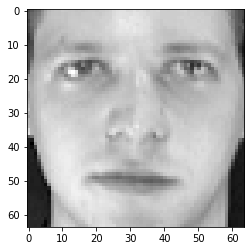

In [133]:
# reshaping to visualize
plt.imshow(dataset.data[0].reshape(64, 64), cmap=plt.cm.gray)

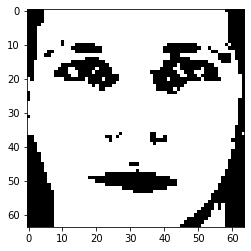

In [134]:
# Example of normalization of an image
#turns the above image into BINARY using THRESHOLD value, here .6; if "darker" than .6, turns to 1 --> balck; if lighter turns to 0 - white
from sklearn.preprocessing import Binarizer

image = dataset.data[0].reshape(64, 64)
normalized_image = Binarizer(threshold=0.6).fit_transform(image)
plt.imshow(normalized_image, cmap=plt.cm.gray)

In [136]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

### Text

Text has also to be transformed to samples-by-features format.
In the simplest case each document is a sample and ocurrence of words are its features.

In [137]:
from sklearn.datasets import fetch_20newsgroups
emails = fetch_20newsgroups(subset='train', categories=['sci.med'], shuffle=True, random_state=0)

In [139]:
print(emails.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [140]:
print(emails.target_names)

['sci.med']


In [141]:
print("Number of documents", len(emails.data))
print("Beginning of the first document", emails.data[0][:500])
##
##
#this tells it to first PRINT the number of documents (594 here)
#then tells it to print the FIRST 500 CHARACTERS (using SLICE feature :) from emails DF, with indexing by 0 (rows) --> ie gives you row + first 499 characters

Number of documents 594
Beginning of the first document From: ron.roth@rose.com (ron roth)
Subject: HYPOGLYCEMIA
X-Gated-By: Usenet <==> RoseMail Gateway (v1.70)
Organization: Rose Media Inc, Toronto, Ontario.
Lines: 31

     anello@adcs00.fnal.gov (Anthony Anello) writes:

A(>  Can anyone tell me if a bloodcount of 40 when diagnosed as hypoglycemic is
A(>  dangerous, i.e. indicates a possible pancreatic problem?  One Dr. says no, the
A(>  other (not his specialty) says the first is negligent and that another blood
A(>  test should be done.  Also, wh


In [143]:
# For every document we count word ocurrence:

from sklearn.feature_extraction.text import CountVectorizer
#count vectorizer gives you ability to COUTN each word in the string you send it
#you're now assigning the COUNT of DF emails in column data (CountVectorizer() BUT since you're using the FIT_TRANSFORM you're also TEACHING it to estimate, and then transforming
#the data set as well fit.transform(emails.data)
emails_in_ML_format = CountVectorizer().fit_transform(emails.data)
print(emails_in_ML_format.shape)

#ie turning the emails into something that's useful for us in ML (machine learning)

(594, 16257)


In [144]:
# Now this is how the first document looks like:
emails_in_ML_format[0].todense()

matrix([[1, 0, 0, ..., 0, 0, 0]])